In [1]:
!pip install sidetable
!pip install pydantic<2
!pip install pydantic-settings
!pip install pandas-profiling
!pip install numba==0.58.1

#Instalação dos pacotes necessários


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.3 MB/s eta 0:00:00
/bin/bash: line 1: 2: No such file or directory
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 9.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c36095b88b135a9cfabb1ade3b400e8d89a94a53632d5069c520a89a5d476f72
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 37.9 MB/s eta

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import sidetable

#Importação dos pacotes julgados necessários

01- ANÁLISE DESCRITIVA

In [5]:
path = '/content/drive/MyDrive/TCC/Protótipo MVP/unscaled_iguatu_lhs_samples.csv'
df = pd.read_csv(path)
df.head()



#Abrindo o arquivo .csv como um dataframe dentro do Python

,A_sf_m2,r_st_m3_per_m2,Q_demand,T_demand,SOLFRAC
0,134.893959,0.002354,5081.733232,81.023513,0.035370
1,130.613099,0.007868,1161.561884,87.799601,0.151607
2,673.730100,0.044702,873.300007,77.990397,0.753242
3,406.399963,0.005135,2553.573094,83.042887,0.205045
4,593.667526,0.016913,3263.575338,84.197955,0.230546


In [6]:
df.describe()

#1ª análise descritiva

,A_sf_m2,r_st_m3_per_m2,Q_demand,T_demand,SOLFRAC
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,500.000724,0.040000,2916.671035,84.999991,0.274787
std,288.711822,0.023097,1523.753027,5.774227,0.214425
min,0.152698,0.000002,278.768568,75.000993,0.003652
25%,249.952431,0.020009,1597.569654,80.003305,0.120580
50%,499.962067,0.040001,2916.800349,85.001055,0.217494
75%,749.860413,0.059997,4236.290713,89.998457,0.367180
max,999.895506,0.079995,5555.446816,94.997008,0.991748


In [7]:
df.info()

#2ª análise descritiva

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   A_sf_m2         4000 non-null   float64
 1   r_st_m3_per_m2  4000 non-null   float64
 2   Q_demand        4000 non-null   float64
 3   T_demand        4000 non-null   float64
 4   SOLFRAC         4000 non-null   float64
dtypes: float64(5)
memory usage: 156.4 KB


02- ANÁLISE EXPLORATÓRIA

In [9]:
pip install ydata-profiling #instalando package especializado para análise exploratória

In [12]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Análise Exploratória')
profile.to_notebook_iframe()

#realizando profile report (não foi muito útil por enquanto, mas pode me ajudar a entender algumas correlações quando eu for me aprofundar na teoria)

Output hidden; open in https://colab.research.google.com to view.

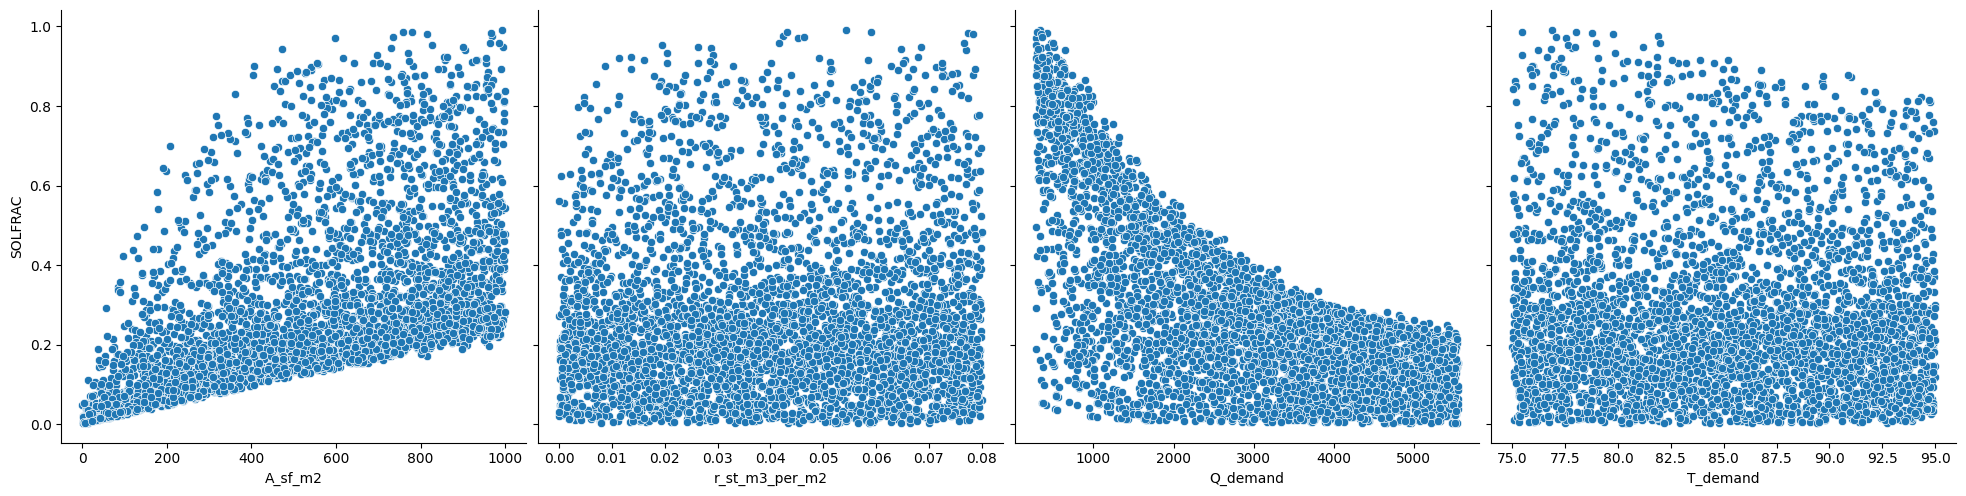

In [20]:
sns.pairplot(df, x_vars=["A_sf_m2", 'r_st_m3_per_m2', 'Q_demand', 'T_demand'], y_vars='SOLFRAC', height=5)

#analisando relação gráfica entre cada variável x e a varável target (depois vou ter que analisar com mais detalhes)

In [22]:
df.corr()

#matriz de relação linear entre as variáveis (meio inútil a princípio, mas Q_demand e A_sf_m2 talvez tenham relação forte suficiente para justificar uma regressão polinomial no futuro)

,A_sf_m2,r_st_m3_per_m2,Q_demand,T_demand,SOLFRAC
A_sf_m2,1.000000,0.001813,0.010032,0.014227,0.593786
r_st_m3_per_m2,0.001813,1.000000,-0.019755,0.017011,0.048375
Q_demand,0.010032,-0.019755,1.000000,0.026620,-0.665288
T_demand,0.014227,0.017011,0.026620,1.000000,-0.034749
SOLFRAC,0.593786,0.048375,-0.665288,-0.034749,1.000000


03- TRATAMENTO

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

#normalização dos dados

df_scaled.head()

,A_sf_m2,r_st_m3_per_m2,Q_demand,T_demand,SOLFRAC
0,0.134776,0.029410,0.910225,0.301186,0.032100
1,0.130494,0.098341,0.167301,0.640058,0.149737
2,0.673751,0.558810,0.112672,0.149500,0.758620
3,0.406352,0.064174,0.431105,0.402175,0.203819
4,0.593668,0.211416,0.565660,0.459940,0.229627


In [38]:
x_variables = df_scaled.drop(columns='SOLFRAC').copy()
y_variables = df_scaled.SOLFRAC.copy()

#criando dataframes para variáveis x e y para uso posterior

04- MODELAGEM

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#Importação de packages aleatórios de regressão apenas para fins de demonstração

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x_variables, y_variables, test_size=0.3, random_state=42)

#Dividindo X e Y em sessões para teste e treino, sendo 70% para treino e 30% para teste. A divisão será aleatória.

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

#Criando lr como um modelo simples de regressão linear e treinando ele com os dataframes de treino

LinearRegression()

In [46]:
y_predict = lr.predict(X_test)
y_check = lr.predict(X_train)
#Criando um dataframe y_predict com previsões realizadas sobre X de teste utilizando o modelo lr e criando uma previsão na base de treino para verificar overfitting

In [45]:
r = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
print('r= ',r)
print('mse= ',mse)

#Testando os resultados de y_predict com os valores reais de y_test (aparentemente a regressão linear simples resultou  em 80%, acima do que eu esperava)

r=  0.8085635853894086
mse=  0.00933068004266678


In [48]:
r_check = r2_score(y_train, y_check)
mse_check = mean_squared_error(y_train, y_check)
print('r= ',r_check)
print('mse= ',mse_check)

#Testando o modelo na base de treino para verificar existência de overfitting (não há overfitting nesse caso)

r=  0.8033526403468888
mse=  0.009117587857438613


In [50]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

#Criando dtr como um modelo simples de regressão por árvore de decisão e treinando ele com os dataframes de treino

DecisionTreeRegressor()

In [51]:
y_predict_dtr = dtr.predict(X_test)
y_check_dtr = dtr.predict(X_train)
#realizando previsões na base de teste e criando uma previsão na base de treino para verificar overfitting

In [52]:
r_dtr = r2_score(y_test, y_predict)
mse_dtr = mean_squared_error(y_test, y_predict)
print('r= ',r_dtr)
print('mse= ',mse_dtr)

#Testando os resultados de y_predict com os valores reais de y_test (basicamente mesmo resultado da regressão linear)

r=  0.8085635853894086
mse=  0.00933068004266678


In [53]:
r_check_dtr = r2_score(y_train, y_check)
mse_check_dtr = mean_squared_error(y_train, y_check)
print('r= ',r_check_dtr)
print('mse= ',mse_check_dtr)

#Testando o modelo na base de treino para verificar existência de overfitting (não há overfitting nesse caso)

r=  0.8033526403468888
mse=  0.009117587857438613


05- OTIMIZAÇÃO DE PARÂMETROS

Nesta sessão será realizada uma busca de parâmetros ótimos, mas ainda não decidi se será uma busca por grid, busca aleatória ou algum outro tipo de busca. Preciso entender melhor a origem dos dados e me aprofundar um pouco nas regressões utilizadas pra fundamentar melhor essa busca.

06- AVALIAÇÃO DE RESULTADOS

Aqui os modelos otimizados na sessão anterior serão avaliados através das métricas apropriadas (a serem definidas e justificadas teoricamente)